# <center>${\textbf{Artificial Intelligence Decision Support System}}$<br>${\textbf{ for Groundwater Management under Climate Change:}}$</center><br><center>${\textbf{ Application to Mornag Region in Tunisia}}$</center><br><center>${\textbf{Part 4 : Deployment Using XGBoost}}$</center>


**Table of Contents**

* [Importing Libraries](#libraris)
* [Forecasting under Climate Change scenarios](#cc)
    * [Representative Concentration Pathway :RCP 4.5](#rcp4.5_1)
    * [Representative Concentration Pathway :RCP 8.5](#rcp8.5_1)

    

<a id="libraries"></a>

${\textbf{Importing Libraries}}$

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


import xgboost as xgb
import tensorflow as tf

import pickle

import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
XGBModel = pickle.load(open('./Pickles/Models/XGBmodel.pkl', 'rb'))


In [3]:
Historical_Data = pd.read_pickle('./Pickles/Data/Historical_Data.pkl')
del Historical_Data["Time_PZ"]
Historical_Data.index=Historical_Data.Time_RF
column=['Piezometer','Pluviometer','YearlyRF','SemestrialRF','TrimestrialRF','MonthlyRF','Zone','SPI','SPI_classes','Lat','Lon','Lat_Pluviometer','Lon_Pluviometer','Month','Year','Pz']#Reindexing
Historical_Data=Historical_Data.reindex(column, axis='columns')
list_Year= [d.year for d in Historical_Data.index]
list_Month= [d.month for d in Historical_Data.index]
Historical_Data['Month'] = list_Month
Historical_Data['Year'] = list_Year

<a id="cc"></a>

## ${\textbf{XGBoost Forecasting under Climate Change scenarios}}$

<a id="rcp4.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 4.5 }}$

In [4]:
RCP45 = pd.read_pickle('./Pickles/Data/RCP45BNU.pkl')
del RCP45['MonthlyRF']
RCP45.rename(columns = {'Mean':'MonthlyRF'}, inplace = True)#Renaming Zone_num to zone for more clarity

In [5]:
lb_make = LabelEncoder()
RCP45["Piezometer"] = lb_make.fit_transform(RCP45["Piezometer"])
lb_make1 = LabelEncoder()
RCP45["Pluviometer"] = lb_make1.fit_transform(RCP45["Pluviometer"])
lb_make2 = LabelEncoder()
RCP45["SPI_classes"] = lb_make2.fit_transform(RCP45["SPI_classes"])

In [6]:
dtest = xgb.DMatrix(RCP45)
y_pred = XGBModel.predict(dtest, ntree_limit=XGBModel.best_ntree_limit)

RCP45["Piezometer"] = lb_make.inverse_transform(RCP45["Piezometer"])
RCP45["Pluviometer"] = lb_make1.inverse_transform(RCP45["Pluviometer"])
RCP45["SPI_classes"] = lb_make2.inverse_transform(RCP45["SPI_classes"])
RCP45["Pz"]=y_pred

In [7]:
RCP45

,Piezometer,Pluviometer,YearlyRF,SemestrialRF,TrimestrialRF,MonthlyRF,Zone,SPI,SPI_classes,Lat,Lon,Lat_Pluviometer,Lon_Pluviometer,Month,Year,Pz
date,,,,,,,,,,,,,,,,
2009-01-01,Ben Zazia,BEN AROUS I MUNICIPA,343.83,245.66,159.38,39.34,4,0.410278,Moderately Wet,36.712677,10.296590,36.76500,-10.22111,1,2009,11.690152
2009-01-01,Fraj,BEN AROUS I MUNICIPA,343.83,245.66,159.38,39.34,4,0.410278,Moderately Wet,36.721854,10.300582,36.76500,-10.22111,1,2009,9.834298
2009-01-01,Bir El Kif,BEN AROUS I MUNICIPA,343.83,245.66,159.38,39.34,4,0.410278,Moderately Wet,36.717664,10.294973,36.76500,-10.22111,1,2009,4.905276
2009-01-01,El Attar,BEN AROUS I MUNICIPA,343.83,245.66,159.38,39.34,4,0.410278,Moderately Wet,36.728039,10.314714,36.76500,-10.22111,1,2009,-13.230326
2009-01-01,Majoul,BEN AROUS I MUNICIPA,343.83,245.66,159.38,39.34,4,0.410278,Moderately Wet,36.736674,10.273134,36.76500,-10.22111,1,2009,-9.893703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-01,UCP Ouzra,OUZRA AGRI FLORA,256.99,153.64,111.50,25.56,1,-0.138415,Moderately dry,36.650512,10.231095,36.62639,-10.25639,12,2100,16.557459
2100-12-01,Salah Khamar,OUZRA AGRI FLORA,256.99,153.64,111.50,25.56,1,-0.138415,Moderately dry,36.653313,10.191087,36.62639,-10.25639,12,2100,18.737572
2100-12-01,Haj Hadi Jani,OUZRA AGRI FLORA,256.99,153.64,111.50,25.56,1,-0.138415,Moderately dry,36.641648,10.270523,36.62639,-10.25639,12,2100,20.801502


<a id="rcp8.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 8.5}}$

In [8]:
RCP85 = pd.read_pickle('./Pickles/Data/RCP85BNU.pkl')
del RCP85['MonthlyRF']
RCP85.rename(columns = {'Mean':'MonthlyRF'}, inplace = True)#Renaming Zone_num to zone for more clarity

In [9]:
lb_make = LabelEncoder()
RCP85["Piezometer"] = lb_make.fit_transform(RCP85["Piezometer"])
lb_make1 = LabelEncoder()
RCP85["Pluviometer"] = lb_make1.fit_transform(RCP85["Pluviometer"])
lb_make2 = LabelEncoder()
RCP85["SPI_classes"] = lb_make2.fit_transform(RCP85["SPI_classes"])

In [10]:
dtest = xgb.DMatrix(RCP85)
y_pred = XGBModel.predict(dtest, ntree_limit=XGBModel.best_ntree_limit)
RCP85["Piezometer"] = lb_make.inverse_transform(RCP85["Piezometer"])
RCP85["Pluviometer"] = lb_make1.inverse_transform(RCP85["Pluviometer"])
RCP85["SPI_classes"] = lb_make2.inverse_transform(RCP85["SPI_classes"])
RCP85["Pz"]=y_pred

In [11]:
RCP85

,Piezometer,Pluviometer,YearlyRF,SemestrialRF,TrimestrialRF,MonthlyRF,Zone,SPI,SPI_classes,Lat,Lon,Lat_Pluviometer,Lon_Pluviometer,Month,Year,Pz
date,,,,,,,,,,,,,,,,
2009-01-01,Ben Zazia,BEN AROUS I MUNICIPA,383.17,245.36,199.12,24.18,4,-0.178843,Moderately dry,36.712677,10.296590,36.76500,-10.22111,1,2009,11.250866
2009-01-01,Fraj,BEN AROUS I MUNICIPA,383.17,245.36,199.12,24.18,4,-0.178843,Moderately dry,36.721854,10.300582,36.76500,-10.22111,1,2009,10.003749
2009-01-01,Bir El Kif,BEN AROUS I MUNICIPA,383.17,245.36,199.12,24.18,4,-0.178843,Moderately dry,36.717664,10.294973,36.76500,-10.22111,1,2009,4.958839
2009-01-01,El Attar,BEN AROUS I MUNICIPA,383.17,245.36,199.12,24.18,4,-0.178843,Moderately dry,36.728039,10.314714,36.76500,-10.22111,1,2009,-13.153183
2009-01-01,Majoul,BEN AROUS I MUNICIPA,383.17,245.36,199.12,24.18,4,-0.178843,Moderately dry,36.736674,10.273134,36.76500,-10.22111,1,2009,-9.777392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-01,UCP Ouzra,OUZRA AGRI FLORA,337.77,157.14,138.04,25.31,1,-0.133451,Moderately dry,36.650512,10.231095,36.62639,-10.25639,12,2100,16.766607
2100-12-01,Salah Khamar,OUZRA AGRI FLORA,337.77,157.14,138.04,25.31,1,-0.133451,Moderately dry,36.653313,10.191087,36.62639,-10.25639,12,2100,18.885044
2100-12-01,Haj Hadi Jani,OUZRA AGRI FLORA,337.77,157.14,138.04,25.31,1,-0.133451,Moderately dry,36.641648,10.270523,36.62639,-10.25639,12,2100,21.170912


In [12]:
# RCP45=RCP45[RCP45.Year>2015]
# RCP85=RCP85[RCP85.Year>2015]

In [13]:
# Historical_Data = pd.read_pickle('./Pickles/Data/Historical_Data.pkl')
# del Historical_Data["Time_PZ"]
# Historical_Data.index=Historical_Data.Time_RF
# column=['Piezometer','Pluviometer','YearlyRF','SemestrialRF','TrimestrialRF','MonthlyRF','Zone','SPI','SPI_classes','Lat','Lon','Lat_Pluviometer','Lon_Pluviometer','Month','Year','Pz']#Reindexing
# Historical_Data=Historical_Data.reindex(column, axis='columns')
# list_Year= [d.year for d in Historical_Data.index]
# list_Month= [d.month for d in Historical_Data.index]
# Historical_Data['Month'] = list_Month
# Historical_Data['Year'] = list_Year
# frames45 = [RCP45, Historical_Data]
# result45 = pd.concat(frames45)
# Historical_Data = pd.read_pickle('./Pickles/Data/Historical_Data.pkl')
# del Historical_Data["Time_PZ"]
# Historical_Data.index=Historical_Data.Time_RF
# column=['Piezometer','Pluviometer','YearlyRF','SemestrialRF','TrimestrialRF','MonthlyRF','Zone','SPI','SPI_classes','Lat','Lon','Lat_Pluviometer','Lon_Pluviometer','Month','Year','Pz']#Reindexing
# Historical_Data=Historical_Data.reindex(column, axis='columns')
# list_Year= [d.year for d in Historical_Data.index]
# list_Month= [d.month for d in Historical_Data.index]
# Historical_Data['Month'] = list_Month
# Historical_Data['Year'] = list_Year
# frames85 = [RCP85, Historical_Data]
# result85 = pd.concat(frames85)

In [14]:
df.plot?

Object `df.plot` not found.


Ben Zazia


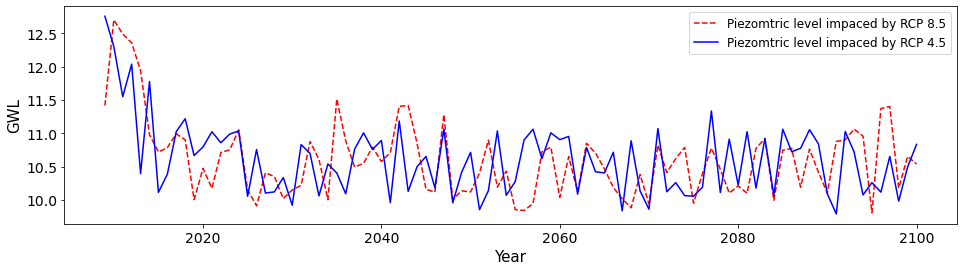

Fraj


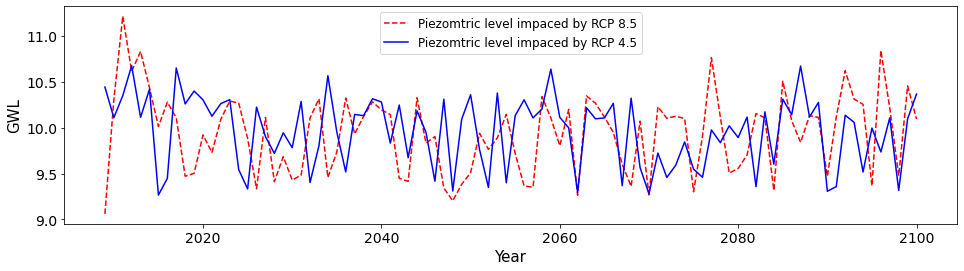

Bir El Kif


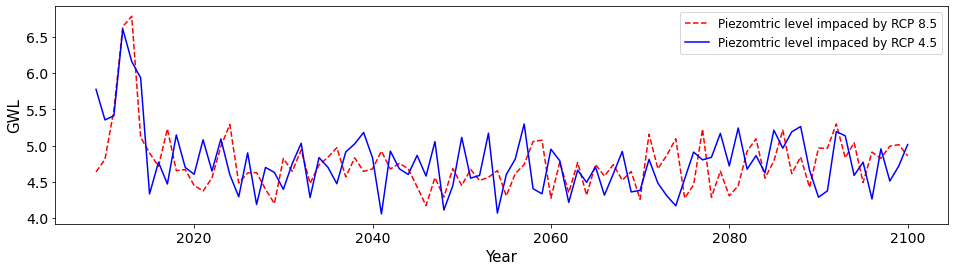

El Attar


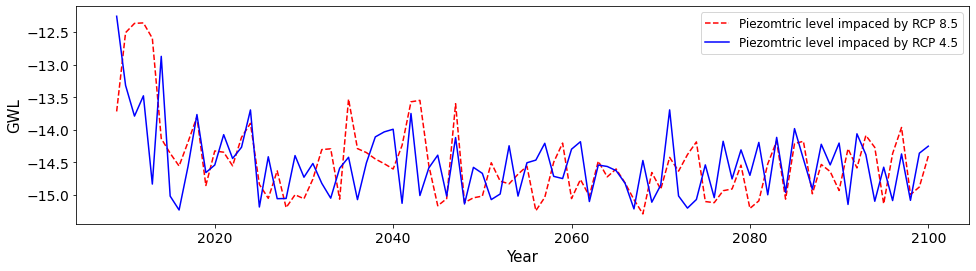

Majoul


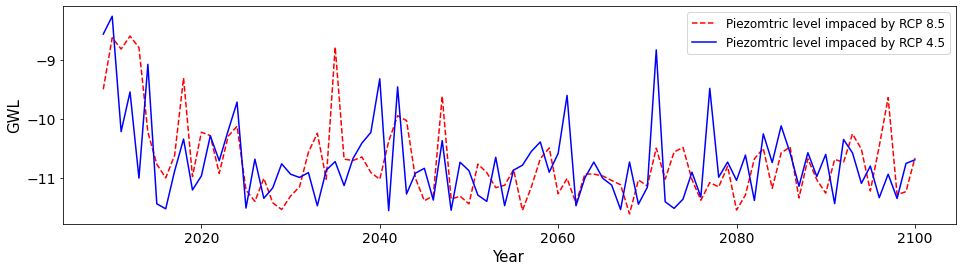

Puits Public_5779


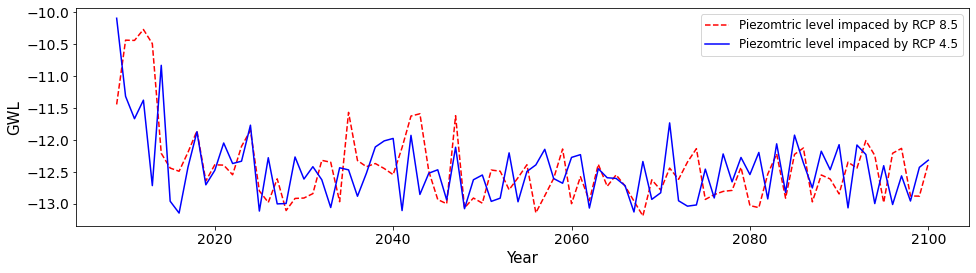

Hachmi Allagui


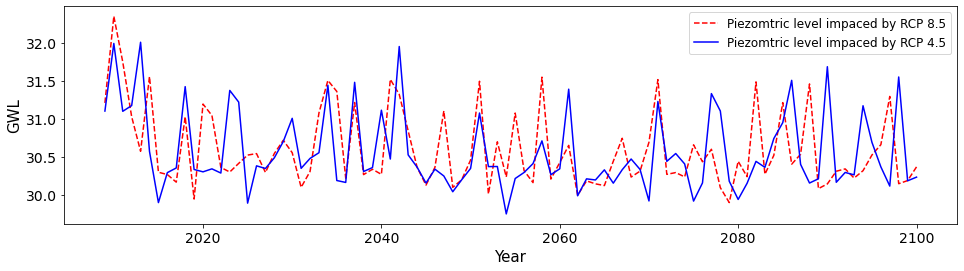

G.O.V.P.F


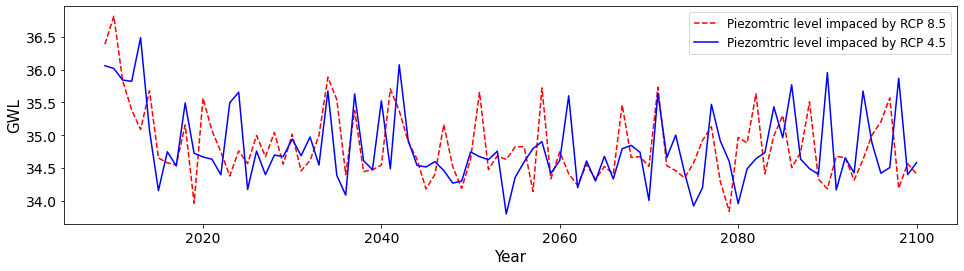

Mzabi


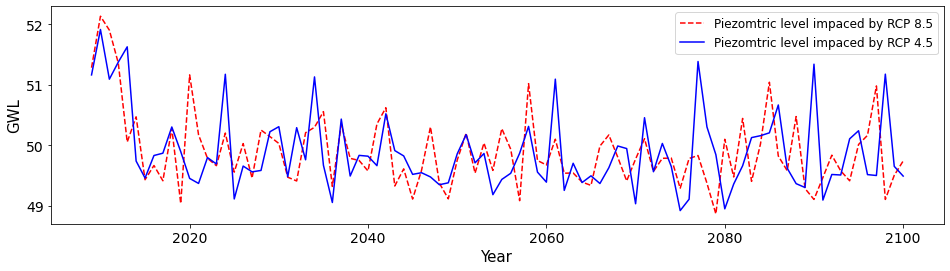

Naceur Dababi


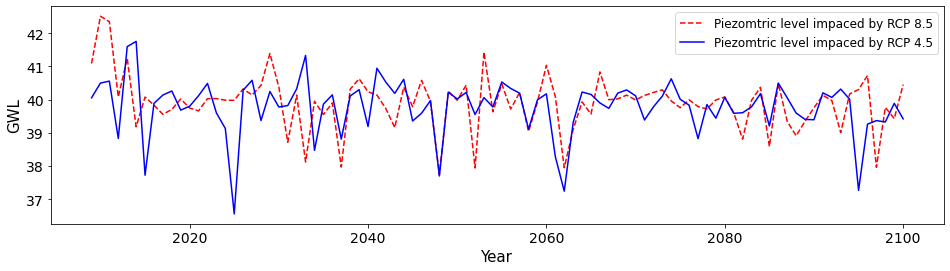

INRAT


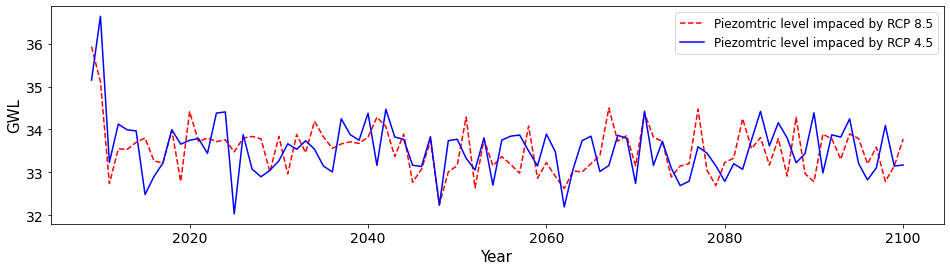

Mohamed Ben Nouiji


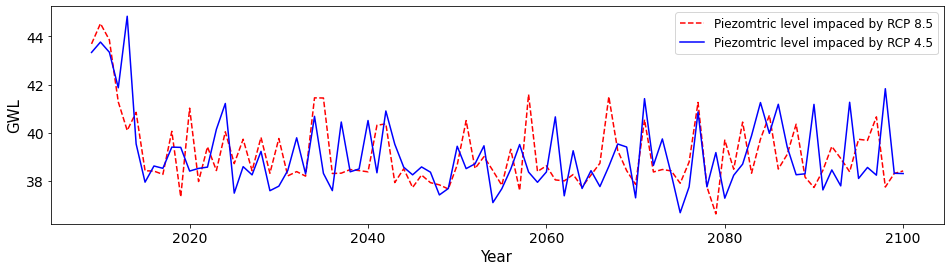

UCP Errissala_B


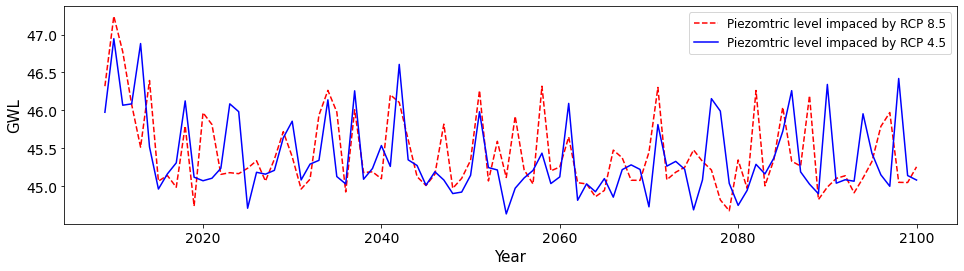

Ben Khalifa


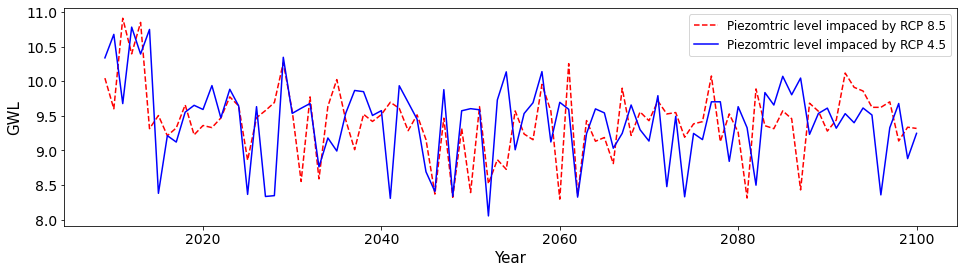

Usine Curamique


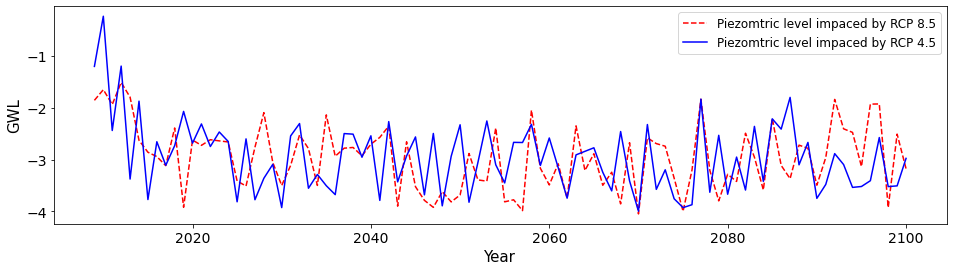

Mohamed Boutnini


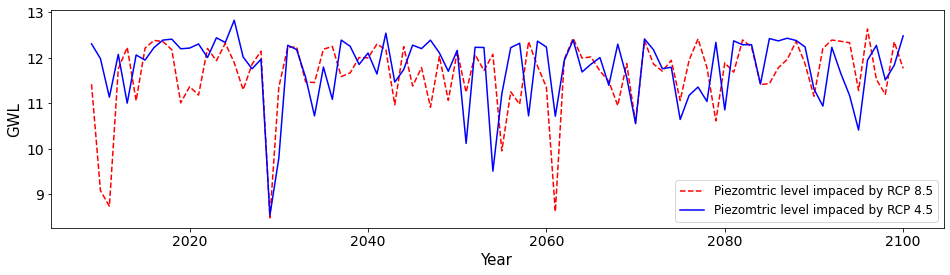

INAT Zaouia


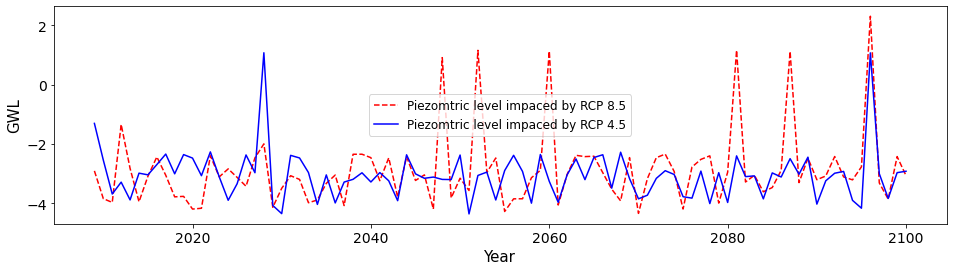

Ali El Almi


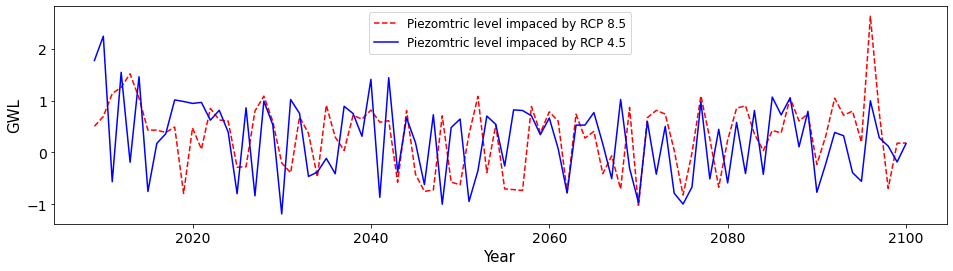

Bel Hassen Sahli


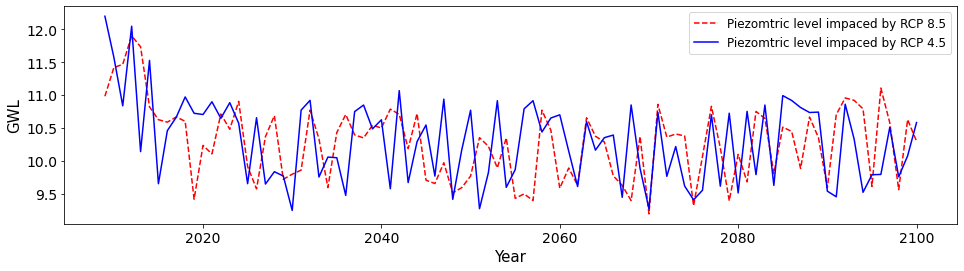

Azzouz El Bahri 1


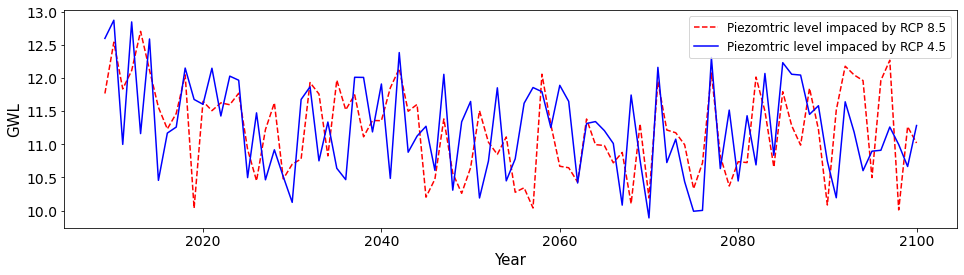

Haj Meftah Allagui


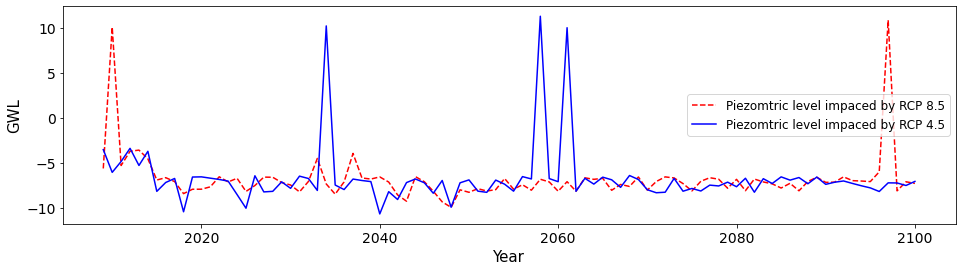

Salah Meziene


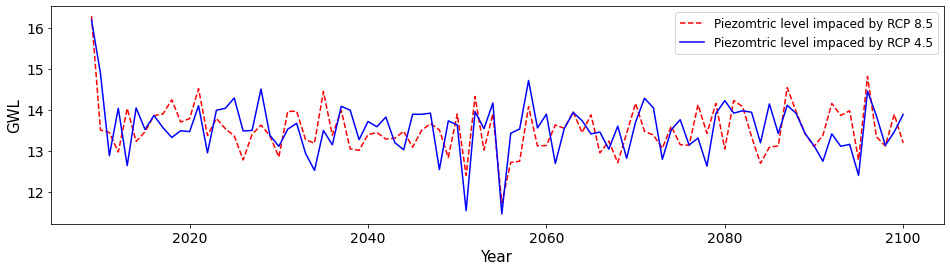

UCP Sidi Daoud


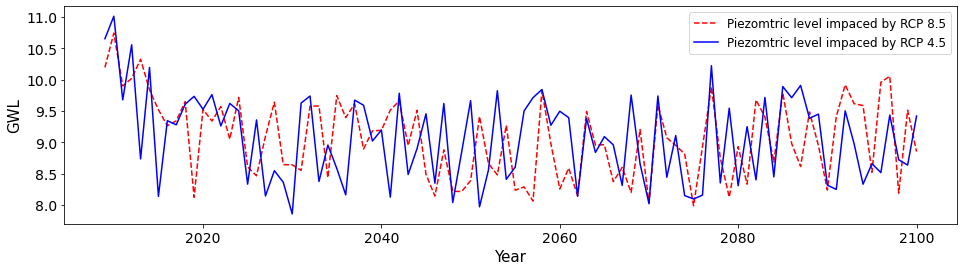

Hamadi Belarbi


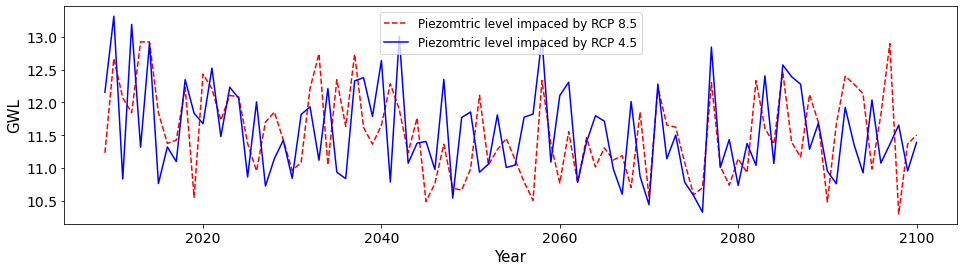

UCP Ennajah_484


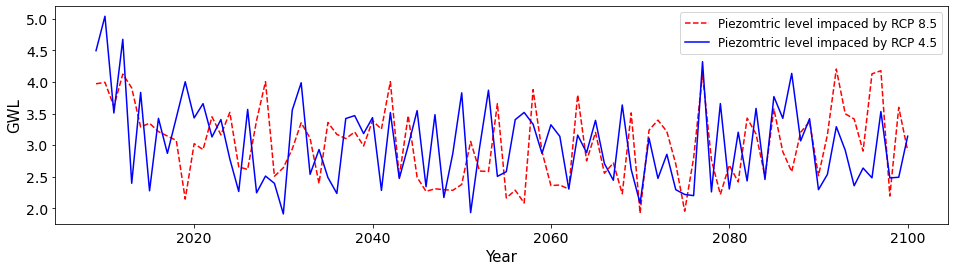

UCP Ennajah_494


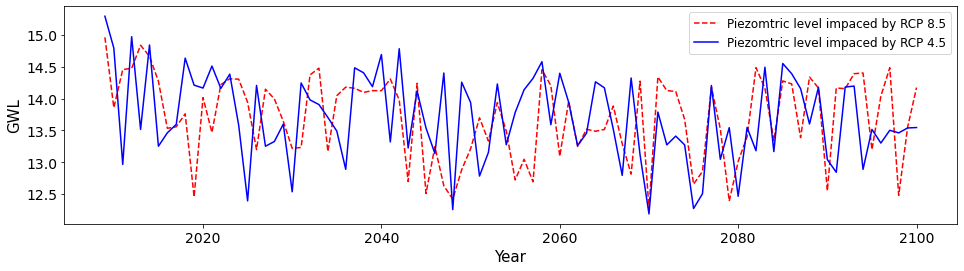

Ali et Med Bel Arbi


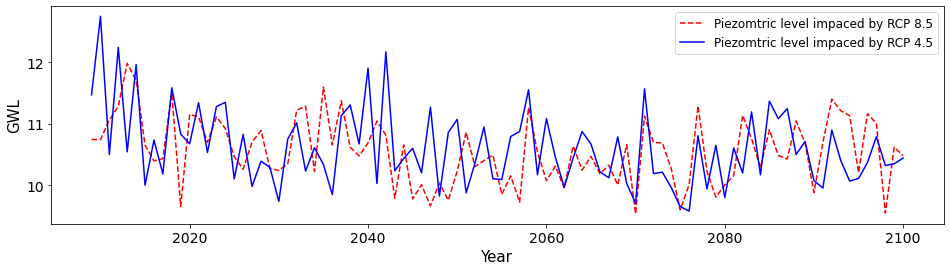

UCP Errissala_620


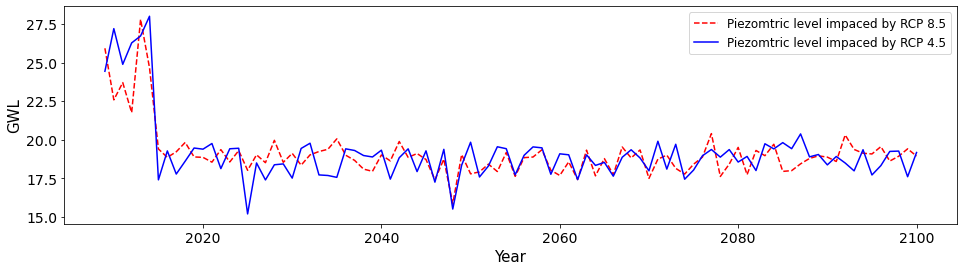

Puit OTD


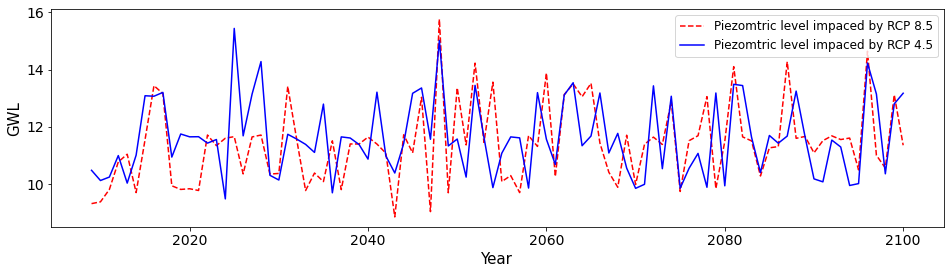

Sadok Belaid


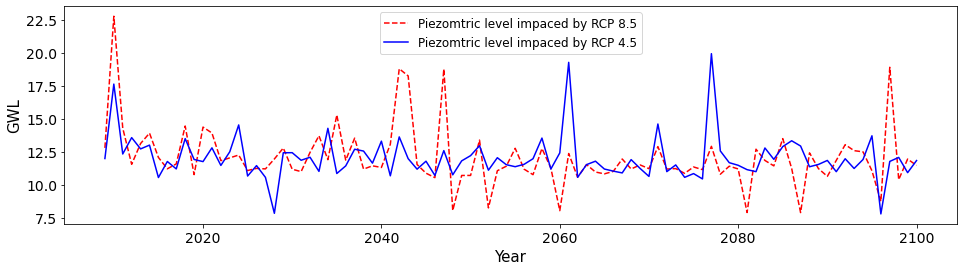

Huritier Sgaier


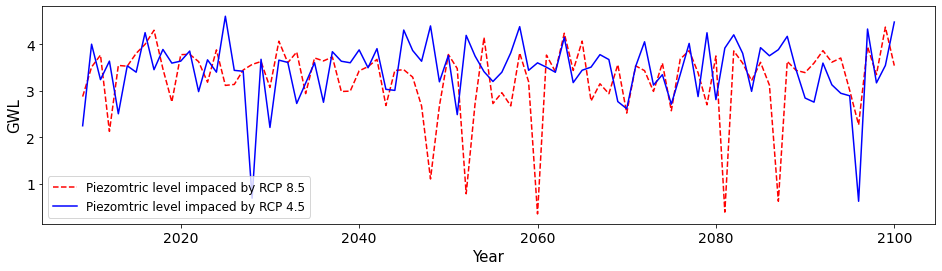

Puits Public_3292


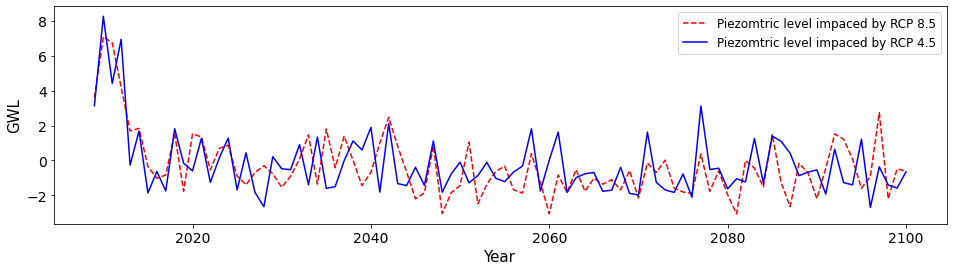

B. Abdallah


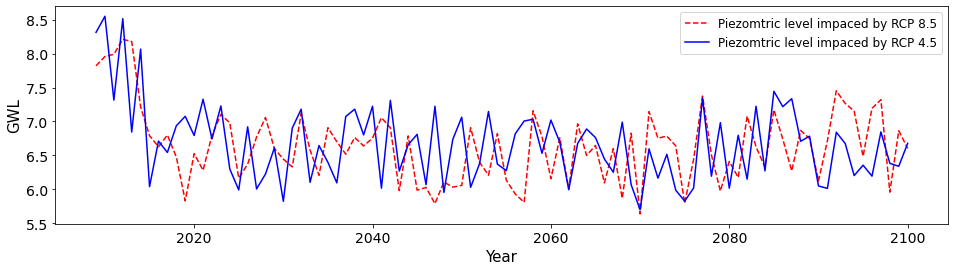

Puits public_6582


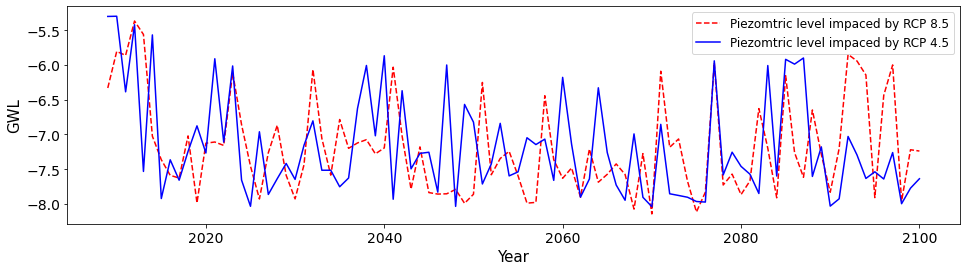

Mohamed ben Rouis


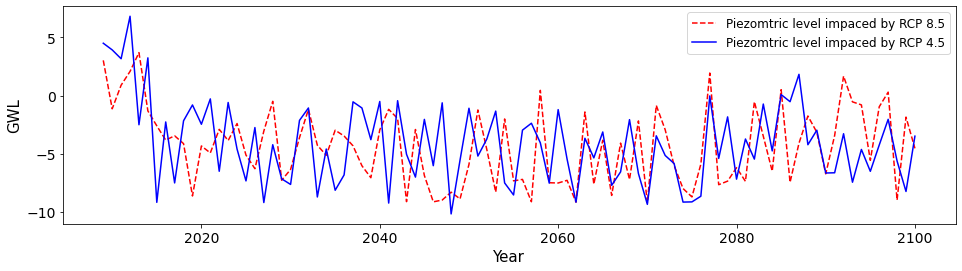

Ali Hanzouti


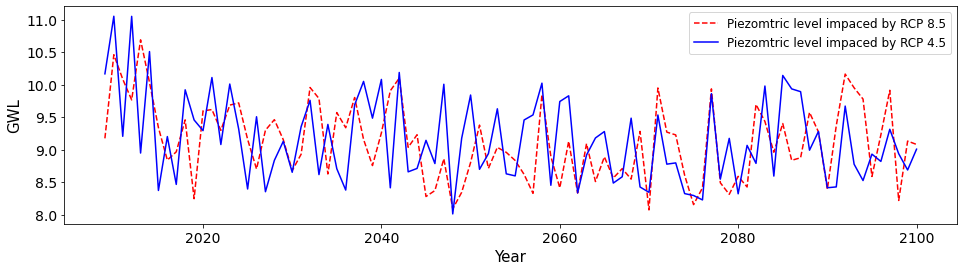

Puits Barrouta


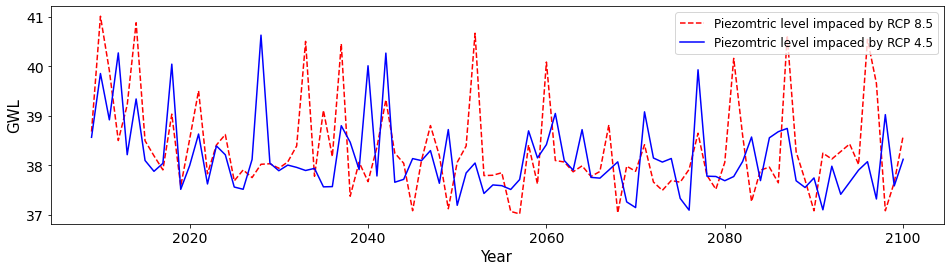

Ben Saad


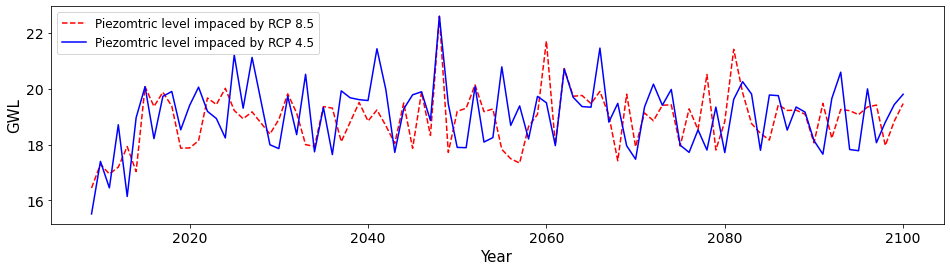

Ecole de Police


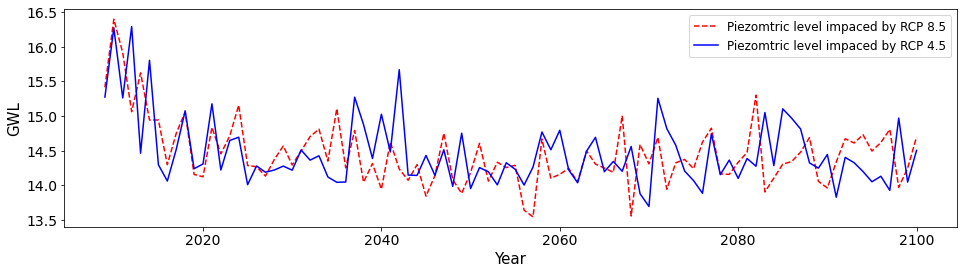

UCP Ouzra


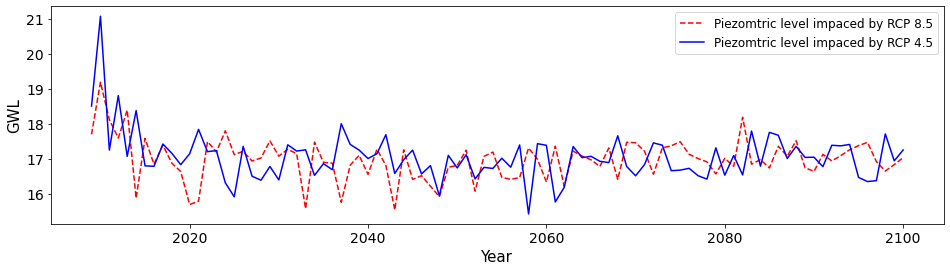

Salah Khamar


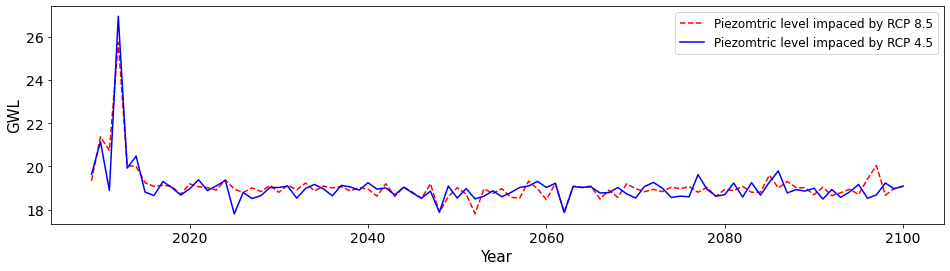

Haj Hadi Jani


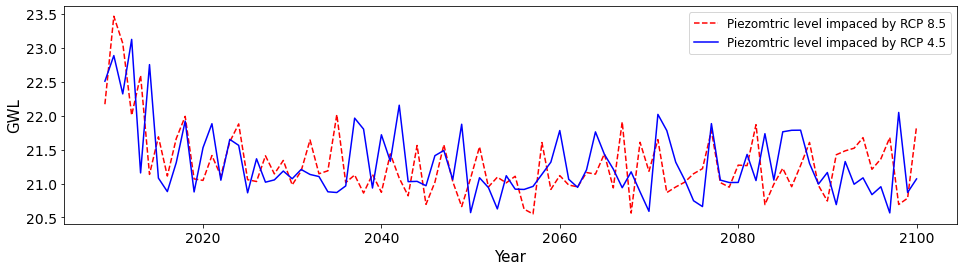

Azaiz ben Attia


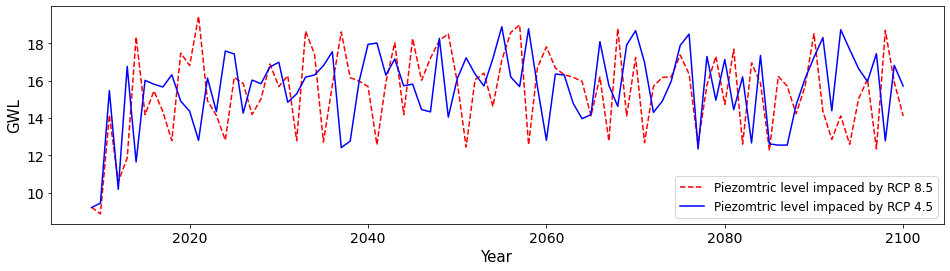

Delagi


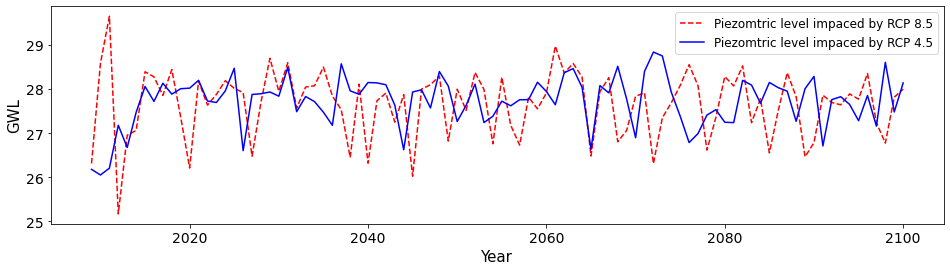

In [15]:
list_nom = RCP85.Piezometer.unique()
# list_nom=['Fraj']
# plt.rcParams['font.size'] = '16'
for d in list_nom:
    print(d)
    df=RCP85[(RCP85.Piezometer==d)& (RCP85.Month==9)]
    df1=RCP45[(RCP45.Piezometer==d)& (RCP45.Month==9)]
    plt.rcParams['figure.figsize'] = (16, 4)
    plt.rcParams['axes.grid'] = False
    plt.rcParams['font.size'] = '14'
    plt.plot(df.groupby(['Year'])['Pz'].mean(),'r--')
    plt.plot(df1.groupby(['Year'])['Pz'].mean(),'b')
    plt.legend(('Piezomtric level impaced by RCP 8.5','Piezomtric level impaced by RCP 4.5'),fontsize=12, loc = 0)
    plt.xlabel('Year',fontsize=15)
    plt.ylabel('GWL',fontsize=15)
    plt.grid
    plt.show()